In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.formula.api as smf 
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot
import warnings 
warnings.filterwarnings('ignore')

# Problem Statement
Consider only the below columns and prepare a prediction model for predicting Price
Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [2]:
df = pd.read_csv('E:\\Data Science\\Assignments\\Multi Linear Regression\\ToyotaCorolla.csv',encoding = 'latin1')

In [3]:
df = df [['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
df.head(10)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
6,16900,27,94612,90,2000,3,5,210,1245
7,18600,30,75889,90,2000,3,5,210,1245
8,21500,27,19700,192,1800,3,5,100,1185
9,12950,23,71138,69,1900,3,5,185,1105


In [4]:
df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


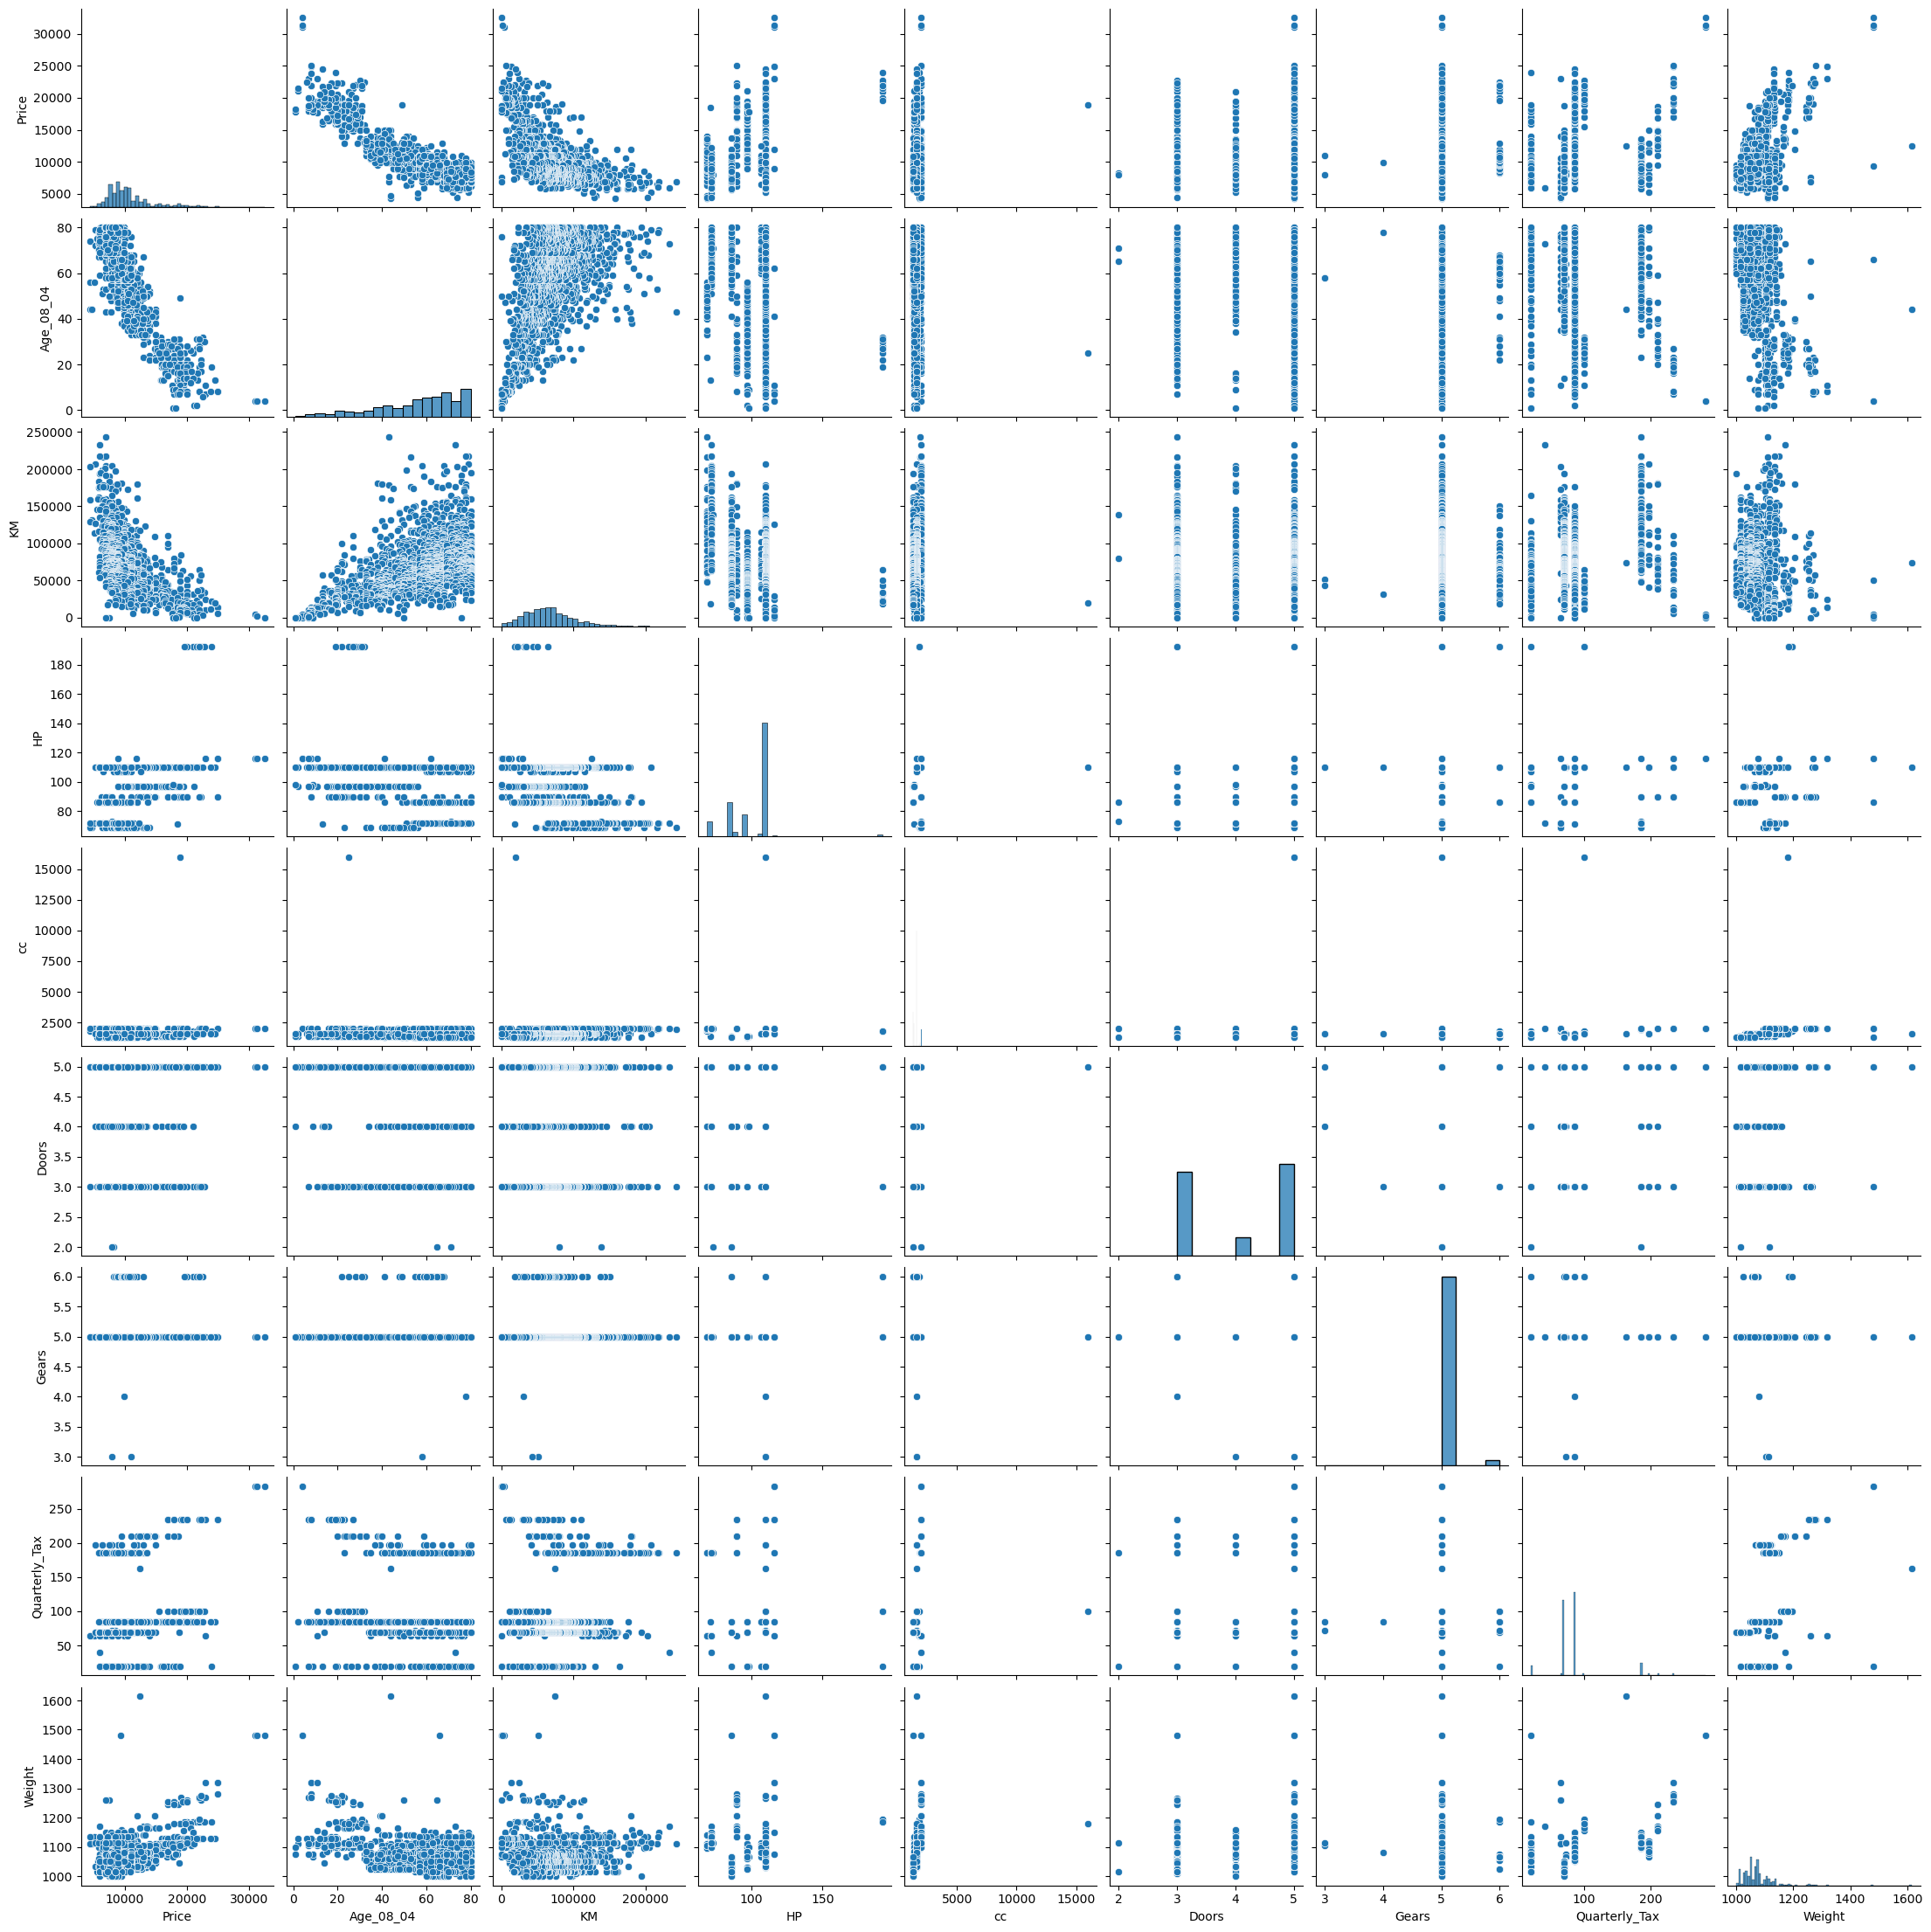

In [5]:
sns.pairplot(df)

<Axes: >

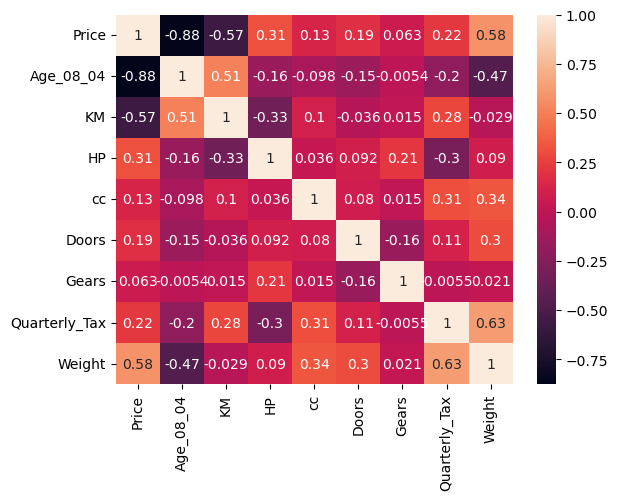

In [6]:
sns.heatmap(df.corr(), annot = True)

## Regression Model

In [7]:
X = df[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
Y = df[['Price']]

In [8]:
model = sm.OLS(Y, X).fit()
pred = model.predict(X)

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.247e+04
Date:                Fri, 01 Dec 2023   Prob (F-statistic):                        0.00
Time:                        16:48:51   Log-Likelihood:                         -12383.
No. Observations:                1436   AIC:                                  2.478e+04
Df Residuals:                    1428   BIC:                                  2.482e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04      -125.4510      2.445    -51.303      0.000    -130.248    -120.654
KM               -0.0205      0.001    -16.305      0.000      -0.023      -0.018
HP               33.4737      2.796     11.973      0.000      27.990      38.958
cc               -0.1032      0.090     -1.141      0.254      -0.281       0.074
Doors            -7.2494     40.184     -0.180      0.857     -86.075      71.576
Gears            78.3780    148.258      0.529      0.597    -212.449     369.205
Quarterly_Tax     5.8258      1.227      4.748      0.000       3.419       8.233
Weight           14.0322      0.773     18.157      0.000      12.516      15.548
==============================================================================
Omnibus:                      108.641   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              562.996
Skew:                           0.019   Prob(JB):                    5.59e-123
Kurtosis:                       6.067   Cond. No.                     3.26e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
model.pvalues

Age_08_04        0.000000e+00
KM               6.092526e-55
HP               1.501755e-31
cc               2.541051e-01
Doors            8.568595e-01
Gears            5.971239e-01
Quarterly_Tax    2.260004e-06
Weight           1.893457e-66
dtype: float64

## Multicollinearity

## VIF

In [11]:
vif = pd.DataFrame()

In [12]:
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [13]:
vif["features"] = X.columns
vif

,VIF Factor,features
0,16.392684,Age_08_04
1,7.590522,KM
2,64.894960,HP
3,17.199750,cc
4,21.874692,Doors
5,438.631804,Gears
6,11.020074,Quarterly_Tax
7,543.133076,Weight


In [14]:
# Gears and Weight have high variance inflation factor. 
# So we need to drop one of them to solve multicollinearity

In [15]:
X = df[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax']]

In [16]:
model = sm.OLS(Y, X).fit()
pred = model.predict(X)

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.155e+04
Date:                Fri, 01 Dec 2023   Prob (F-statistic):                        0.00
Time:                        16:48:52   Log-Likelihood:                         -12532.
No. Observations:                1436   AIC:                                  2.508e+04
Df Residuals:                    1429   BIC:                                  2.512e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04      -132.0628      2.682    -49.245      0.000    -137.323    -126.802
KM               -0.0208      0.001    -14.947      0.000      -0.024      -0.018
HP               44.4711      3.027     14.692      0.000      38.533      50.409
cc                0.1805      0.099      1.827      0.068      -0.013       0.374
Doors           272.5298     41.159      6.621      0.000     191.791     353.269
Gears          2417.9083     81.331     29.729      0.000    2258.368    2577.449
Quarterly_Tax    17.0169      1.177     14.462      0.000      14.709      19.325
==============================================================================
Omnibus:                      184.883   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              583.580
Skew:                           0.640   Prob(JB):                    1.89e-127
Kurtosis:                       5.849   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
model.resid

0      -3328.520354
1      -2538.337855
2      -2856.259189
3      -1461.225004
4      -2330.720784
           ...     
1431   -1100.439117
1432    2608.610237
1433      90.249508
1434   -1293.894857
1435   -1969.266718
Length: 1436, dtype: float64

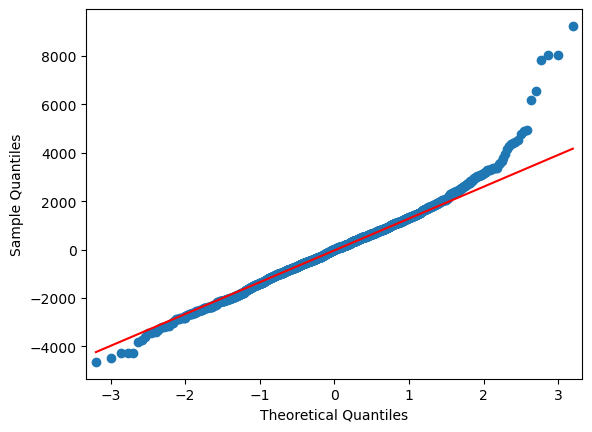

In [19]:
sm.qqplot(model.resid , line = 'q');

In [20]:
np.argmax(model.resid) , np.max(model.resid)

(109, 9240.72656035381)

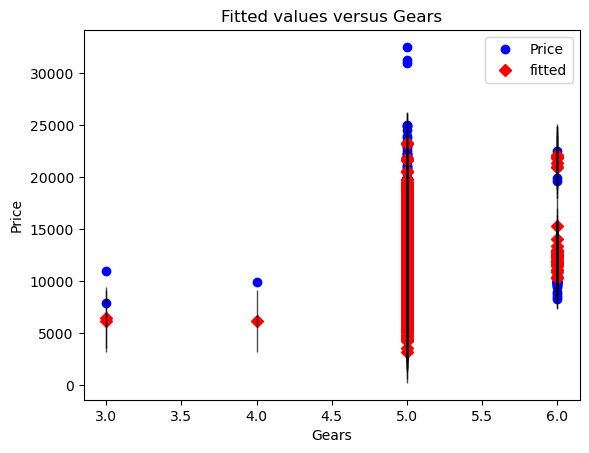

In [21]:
sm.graphics.plot_fit(model,'Gears');

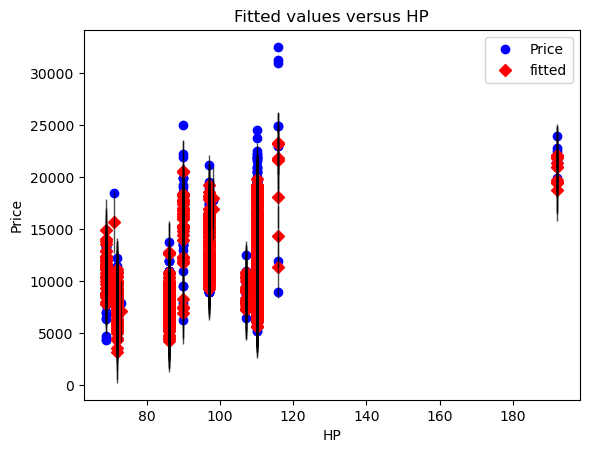

In [22]:
sm.graphics.plot_fit(model,'HP');

In [23]:
inf = model.get_influence()

In [24]:
cd , p = inf.cooks_distance

In [25]:
cd

array([7.35414524e-03, 4.01255800e-03, 5.54212874e-03, ...,
       3.35391420e-06, 6.72930727e-04, 2.12205758e-03])

<StemContainer object of 3 artists>

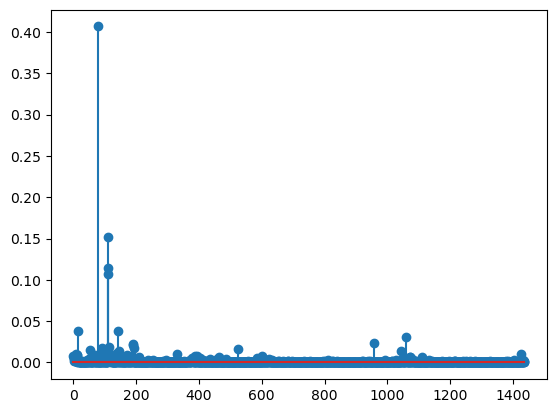

In [26]:
plt.stem(cd)

In [27]:
np.argmax(cd) , np.max(cd)

(80, 0.4066490883551917)

In [28]:
df.iloc[[80]]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


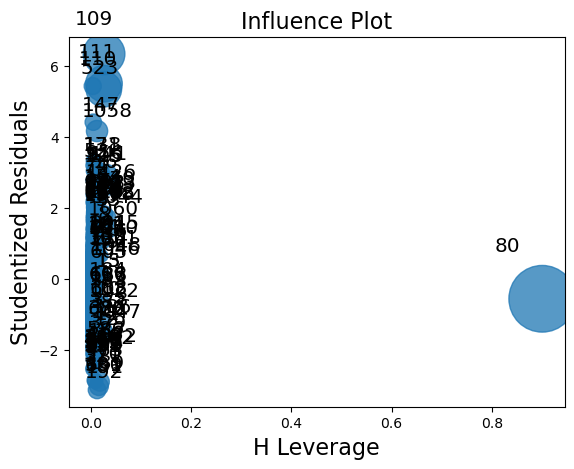

In [29]:
influence_plot(model);

In [30]:
k = len(df.columns)

In [31]:
n = len(df)

In [32]:
lv = 3*(k+1)/n

In [33]:
lv

0.020891364902506964

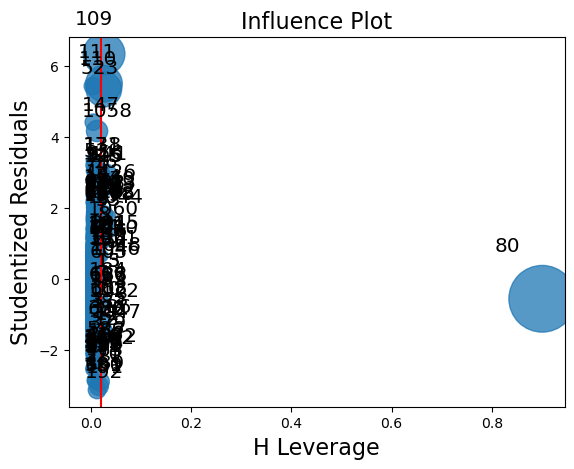

In [34]:
influence_plot(model);
plt.axvline(lv , color = 'red')

In [35]:
df.drop(index = 76 , inplace = True)

# Final Model

In [36]:
finalmodel = sm.OLS(Y,X).fit()

In [37]:
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.155e+04
Date:                Fri, 01 Dec 2023   Prob (F-statistic):                        0.00
Time:                        16:49:04   Log-Likelihood:                         -12532.
No. Observations:                1436   AIC:                                  2.508e+04
Df Residuals:                    1429   BIC:                                  2.512e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04      -132.0628      2.682    -49.245      0.000    -137.323    -126.802
KM               -0.0208      0.001    -14.947      0.000      -0.024      -0.018
HP               44.4711      3.027     14.692      0.000      38.533      50.409
cc                0.1805      0.099      1.827      0.068      -0.013       0.374
Doors           272.5298     41.159      6.621      0.000     191.791     353.269
Gears          2417.9083     81.331     29.729      0.000    2258.368    2577.449
Quarterly_Tax    17.0169      1.177     14.462      0.000      14.709      19.325
==============================================================================
Omnibus:                      184.883   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              583.580
Skew:                           0.640   Prob(JB):                    1.89e-127
Kurtosis:                       5.849   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Interpetation
 Output Interpretation
1 - p-value < 0.01
Thus the model is accepted

2 - coefficient == -132.01
Thus if the value of x increased by 1, the predicted value of Price will decrease by 132.01

3 - Adj. R-sqared == 0.983
Thus the model explains 98.3% of the variance in dependent variable